In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("churn_prediction.csv")
pd.set_option('display.max_columns',None)
data.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,1355.86,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,4957.95,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [2]:
# Separating the customer id
customer_id = data["customer_id"]
data = data.drop(["customer_id"],axis = 1)

In [3]:
data.shape

(28382, 20)

In [4]:
data.describe(include = 'all')

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [5]:
data.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [6]:
for i in data.columns:
    print("values in............ %s.........../n"%i)
    print(data[i].value_counts())

values in............ vintage.........../n
1432    25
1997    23
403     21
1718    20
1400    20
        ..
3903     1
6067     1
5614     1
3581     1
5703     1
Name: vintage, Length: 5473, dtype: int64
values in............ age.........../n
90    1003
40     722
43     711
42     699
37     691
      ... 
3       34
89      24
88      20
2       17
1        4
Name: age, Length: 90, dtype: int64
values in............ gender.........../n
Male      16548
Female    11309
Name: gender, dtype: int64
values in............ dependents.........../n
0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64
values in............ occupation.........../n
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64
values in.........

### Data Exploration

<AxesSubplot:xlabel='gender', ylabel='count'>

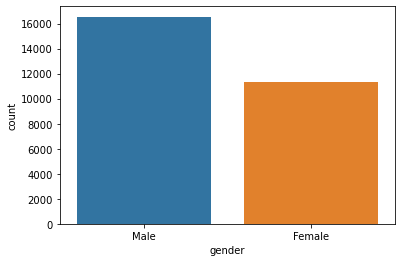

In [7]:
#ratio of male and female
sns.countplot(data["gender"])

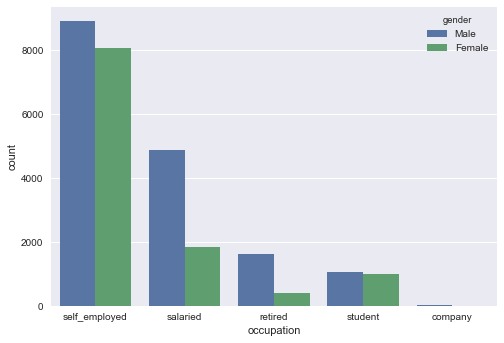

In [8]:
# Male female ratio in different occupation
plt.style.use("seaborn")
sns.countplot(data["occupation"],hue= data["gender"])
plt.show()

No handles with labels found to put in legend.


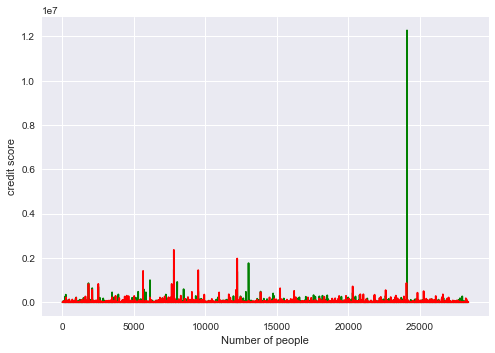

In [9]:
ax = plt.subplot()
ax.plot(data["current_month_credit"],c="green")
ax.plot(data["previous_month_credit"],c="red")
plt.xlabel("Number of people")
plt.ylabel("credit score")
plt.legend()


<AxesSubplot:xlabel='gender', ylabel='age'>

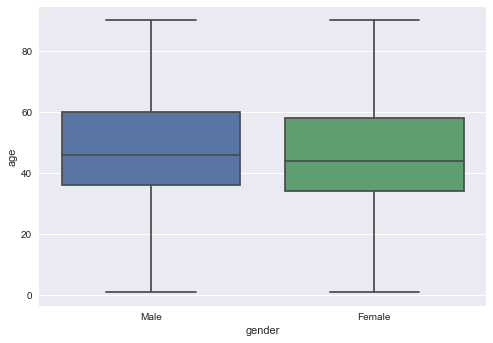

In [10]:
#relation between age and gender
sns.boxplot(x=data["gender"],y=data["age"],data = data)

In [11]:
data.corr()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
vintage,1.000000,0.227390,0.036987,0.044200,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,0.227390,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,0.036987,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.044200,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,-0.167366,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.380714,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,-0.088744,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.002986,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.004518,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886
average_monthly_balance_prevQ,0.003433,0.061708,0.001213,-0.006298,-0.059535,0.001955,-0.012709,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.011960


<AxesSubplot:>

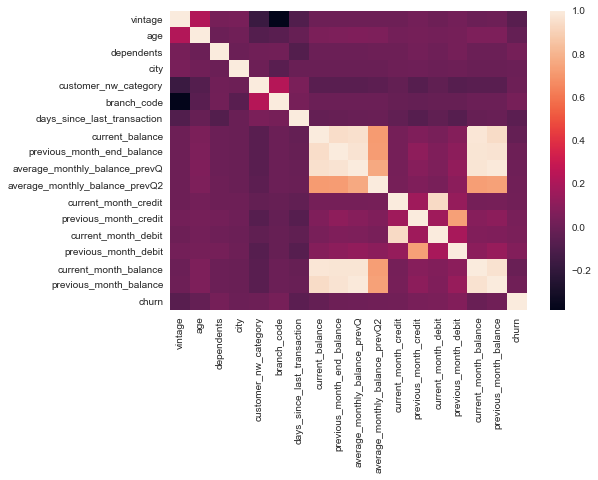

In [12]:
sns.heatmap(data.corr())

### Treating missing value and outlier

In [13]:
#filling gender feature
data["gender"].fillna('Unknown',inplace = True)

In [14]:
#filling occupation feature
data["occupation"].fillna('Unknown',inplace = True)

In [15]:
#filling the dependent column
data["Unknown_mem"] = ""
data["total_mem"] = data["dependents"] + 1
data["Single"] = data["total_mem"].map(lambda x : 1 if x==1 else 0)
data["small_family"] = data["total_mem"].map(lambda x :1 if 2<=x<=4 else 0)
data["large_family"] = data["total_mem"].map(lambda x :1 if x>4 else 0 )
for i in range(len(data)):
    if pd.isnull(data["total_mem"][i])==True:
        data["Unknown_mem"][i] = 1
    else:
        data["Unknown_mem"][i] = 0

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
#Analysis of the current_month_credit and previous_month_credit column


In [17]:
data["rate_change_credit_month"]  = data["current_month_credit"] - data["previous_month_credit"]
for i in range(0,20):
    if data["rate_change_credit_month"][i]==0:
        print(data["current_month_credit"][i],data["previous_month_credit"][i],sep = "   ")
    else:
        pass

0.2   0.2
0.56   0.56
0.61   0.61
0.47   0.47
0.36   0.36
0.64   0.64
0.27   0.27
0.61   0.61
0.16   0.16
0.56   0.56


In [18]:
#from above it is clearly visibe that only those value whose current and previuos credit are ssame are missing
#from the days_since_last_transaction feature
frame = data.loc[data["rate_change_credit_month"]==0]
frame

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Unknown_mem,total_mem,Single,small_family,large_family,rate_change_credit_month
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1.0,1,0,0,0.0
1,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1.0,1,0,0,0.0
2,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1.0,1,0,0,0.0
3,478,90,Unknown,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,1,NaN,0,0,0,0.0
5,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,0,1.0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28370,1601,71,Female,0.0,self_employed,575.0,3,3654,62.0,5248.95,5663.22,5395.50,5758.65,0.37,0.37,414.65,379.14,5295.05,5742.81,0,0,1.0,1,0,0,0.0
28374,658,55,Male,0.0,salaried,1076.0,3,463,306.0,7713.88,7713.88,7713.88,7670.06,0.33,0.33,0.33,0.33,7713.88,7713.88,1,0,1.0,1,0,0,0.0
28376,2155,85,Male,0.0,retired,1589.0,2,389,NaN,1741.50,1741.50,1741.50,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0,0,1.0,1,0,0,0.0
28377,1845,10,Female,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,0,1.0,1,0,0,0.0


In [19]:
#filing the days_since_last_transaction
frame[["days_since_last_transaction","current_month_credit","previous_month_credit",
      "average_monthly_balance_prevQ","average_monthly_balance_prevQ2"]].head(10)


,days_since_last_transaction,current_month_credit,previous_month_credit,average_monthly_balance_prevQ,average_monthly_balance_prevQ2
0,224.0,0.20,0.20,1458.71,1449.07
1,60.0,0.56,0.56,7799.26,12419.41
2,NaN,0.61,0.61,4910.17,2815.94
3,147.0,0.47,0.47,2084.54,1006.54
5,60.0,0.36,0.36,15211.29,13798.82
6,98.0,0.64,0.64,7859.74,11232.37
7,172.0,0.27,0.27,6511.82,16314.17
13,303.0,0.61,0.61,2831.89,8075.81
15,NaN,0.16,0.16,1829.43,2415.57
18,69.0,0.56,0.56,4356.62,3623.20


In [20]:
data["days_since_last_transaction"].fillna(value = frame["days_since_last_transaction"].median(),inplace = True)

### Feature Enginerring

In [21]:
data.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Unknown_mem,total_mem,Single,small_family,large_family,rate_change_credit_month
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1.0,1,0,0,0.00
1,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1.0,1,0,0,0.00
2,2356,31,Male,0.0,salaried,146.0,2,41,124.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1.0,1,0,0,0.00
3,478,90,Unknown,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,1,NaN,0,0,0,0.00
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,3.0,0,1,0,-714.28


In [22]:
#merging two different column to create a new feature
data["Changein_balance_month"] = data["current_balance"] - data["previous_month_balance"] 
data["rate_Change_debit_month"] = data["current_month_balance"] - data["previous_month_debit"]
data["Changein_balance_Q"] = data["average_monthly_balance_prevQ"] - data["average_monthly_balance_prevQ2"]
data["Chnagein_avg_balance"] = data["current_month_balance"] - data["previous_month_balance"]

In [23]:
#dropping the useless(merged) column
data.drop(["dependents","current_balance","previous_month_end_balance","average_monthly_balance_prevQ"
          ,"average_monthly_balance_prevQ2","current_month_credit","previous_month_credit",
           "current_month_debit","previous_month_debit","current_month_balance","previous_month_balance"
          ,"total_mem"], axis = 1,inplace = True)

In [24]:
data.head()

,vintage,age,gender,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,churn,Unknown_mem,Single,small_family,large_family,rate_change_credit_month,Changein_balance_month,rate_Change_debit_month,Changein_balance_Q,Chnagein_avg_balance
0,3135,66,Male,self_employed,187.0,2,755,224.0,0,0,1,0,0,0.00,0.00,1458.51,9.64,0.00
1,310,35,Male,self_employed,NaN,2,3214,60.0,0,0,1,0,0,0.00,-3397.24,6396.22,-4620.15,-2290.83
2,2356,31,Male,salaried,146.0,2,41,124.0,0,0,1,0,0,0.00,-1156.98,4747.05,2094.23,-63.86
3,478,90,Unknown,self_employed,1020.0,2,582,147.0,1,1,0,0,0,0.00,622.12,148.58,1078.00,622.12
4,2531,42,Male,self_employed,1494.0,3,388,58.0,1,0,0,1,0,-714.28,-749.44,-380.91,-227.81,-520.01


In [25]:
data["self_emp"] = data["occupation"].map(lambda x :1 if x=='self_employed' else 0)
data["salaried"] = data["occupation"].map(lambda x:1 if x=='salaried' else 0)
data["student"] = data["occupation"].map(lambda x:1 if x=='student' else 0)
data["retired"] = data["occupation"].map(lambda x:1 if x=='retired' else 0)
data["company"] = data["occupation"].map(lambda x:1 if x=='company' else 0)
data["Unknown"] = data["occupation"].map(lambda x:1 if x=='Unknown' else 0)
data.drop(["occupation"],axis = 1,inplace = True)

In [26]:
data.head(20)

,vintage,age,gender,city,customer_nw_category,branch_code,days_since_last_transaction,churn,Unknown_mem,Single,small_family,large_family,rate_change_credit_month,Changein_balance_month,rate_Change_debit_month,Changein_balance_Q,Chnagein_avg_balance,self_emp,salaried,student,retired,company,Unknown
0,3135,66,Male,187.0,2,755,224.0,0,0,1,0,0,0.00,0.00,1458.51,9.64,0.00,1,0,0,0,0,0
1,310,35,Male,NaN,2,3214,60.0,0,0,1,0,0,0.00,-3397.24,6396.22,-4620.15,-2290.83,1,0,0,0,0,0
2,2356,31,Male,146.0,2,41,124.0,0,0,1,0,0,0.00,-1156.98,4747.05,2094.23,-63.86,0,1,0,0,0,0
3,478,90,Unknown,1020.0,2,582,147.0,1,1,0,0,0,0.00,622.12,148.58,1078.00,622.12,1,0,0,0,0,0
4,2531,42,Male,1494.0,3,388,58.0,1,0,0,1,0,-714.28,-749.44,-380.91,-227.81,-520.01,1,0,0,0,0,0
5,263,42,Female,1096.0,2,1666,60.0,0,0,1,0,0,0.00,-147.55,15433.37,1412.47,369.69,1,0,0,0,0,0
6,5922,72,Male,1020.0,1,1,98.0,0,0,1,0,0,0.00,-749.05,6636.80,-3372.63,-679.92,0,0,0,1,0,0
7,1145,46,Male,623.0,2,317,172.0,0,0,1,0,0,0.00,4779.54,2875.40,-9802.35,3246.80,1,0,0,0,0,0
8,2132,31,Male,1096.0,2,4110,19.0,0,0,1,0,0,593.42,-501.56,824.01,576.31,-673.97,0,1,0,0,0,0
9,3379,40,Male,1020.0,2,38,0.0,0,0,0,1,0,2706.16,2541.26,474.31,304.20,-593.53,1,0,0,0,0,0


In [27]:
data.shape

(28382, 23)

In [28]:
data = pd.get_dummies(data)
data.head()

,vintage,age,city,customer_nw_category,branch_code,days_since_last_transaction,churn,Single,small_family,large_family,rate_change_credit_month,Changein_balance_month,rate_Change_debit_month,Changein_balance_Q,Chnagein_avg_balance,self_emp,salaried,student,retired,company,Unknown,gender_Female,gender_Male,gender_Unknown,Unknown_mem_0,Unknown_mem_1
0,3135,66,187.0,2,755,224.0,0,1,0,0,0.00,0.00,1458.51,9.64,0.00,1,0,0,0,0,0,0,1,0,1,0
1,310,35,NaN,2,3214,60.0,0,1,0,0,0.00,-3397.24,6396.22,-4620.15,-2290.83,1,0,0,0,0,0,0,1,0,1,0
2,2356,31,146.0,2,41,124.0,0,1,0,0,0.00,-1156.98,4747.05,2094.23,-63.86,0,1,0,0,0,0,0,1,0,1,0
3,478,90,1020.0,2,582,147.0,1,0,0,0,0.00,622.12,148.58,1078.00,622.12,1,0,0,0,0,0,0,0,1,0,1
4,2531,42,1494.0,3,388,58.0,1,0,1,0,-714.28,-749.44,-380.91,-227.81,-520.01,1,0,0,0,0,0,0,1,0,1,0


In [29]:
data.drop(["Unknown_mem_0","gender_Unknown","Unknown","Unknown_mem_1"],axis = 1,inplace = True)

In [30]:
data.head()

,vintage,age,city,customer_nw_category,branch_code,days_since_last_transaction,churn,Single,small_family,large_family,rate_change_credit_month,Changein_balance_month,rate_Change_debit_month,Changein_balance_Q,Chnagein_avg_balance,self_emp,salaried,student,retired,company,gender_Female,gender_Male
0,3135,66,187.0,2,755,224.0,0,1,0,0,0.00,0.00,1458.51,9.64,0.00,1,0,0,0,0,0,1
1,310,35,NaN,2,3214,60.0,0,1,0,0,0.00,-3397.24,6396.22,-4620.15,-2290.83,1,0,0,0,0,0,1
2,2356,31,146.0,2,41,124.0,0,1,0,0,0.00,-1156.98,4747.05,2094.23,-63.86,0,1,0,0,0,0,1
3,478,90,1020.0,2,582,147.0,1,0,0,0,0.00,622.12,148.58,1078.00,622.12,1,0,0,0,0,0,0
4,2531,42,1494.0,3,388,58.0,1,0,1,0,-714.28,-749.44,-380.91,-227.81,-520.01,1,0,0,0,0,0,1


In [31]:
data.shape

(28382, 22)

### Model Building

In [32]:
#separting indpendent and dependent varriable
x = data.drop(["churn"],axis = 1)
y = data["churn"]

In [33]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled,columns = x.columns)
x.head()



,vintage,age,city,customer_nw_category,branch_code,days_since_last_transaction,Single,small_family,large_family,rate_change_credit_month,Changein_balance_month,rate_Change_debit_month,Changein_balance_Q,Chnagein_avg_balance,self_emp,salaried,student,retired,company,gender_Female,gender_Male
0,0.232330,0.730337,0.113402,0.5,0.157708,0.613699,1.0,0.0,0.0,0.102629,0.602194,0.197056,0.807001,0.632839,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.010221,0.382022,NaN,0.5,0.672035,0.164384,1.0,0.0,0.0,0.102629,0.599841,0.197744,0.806127,0.631192,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.171083,0.337079,0.088539,0.5,0.008366,0.339726,1.0,0.0,0.0,0.102629,0.601393,0.197515,0.807394,0.632793,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.023430,1.000000,0.618557,0.5,0.121523,0.402740,0.0,0.0,0.0,0.102629,0.602625,0.196873,0.807202,0.633286,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.184842,0.460674,0.906004,1.0,0.080945,0.158904,0.0,1.0,0.0,0.102577,0.601675,0.196800,0.806956,0.632465,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# splitting of the data 
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 50,stratify = y)


#####  Using XGBoost algorithm

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier(n_estimators = 100,min_child_weight = 10,learning_rate = 0.2,
                   colsample_bytree = 0.8,max_depth = 2,gamma = 0.1)


In [36]:
para = {
    "n_estimators":[x for x in range(100,1000,100)],
    " max_depth":[2,3,5,7,8,9,10,12,15],
    " gamma":[0.1,0.2,0.3,0.4,0.5],
    "min_child_weight":[1,3,5,7,8,9,10],
    "colsample_bytree":[0.2,0.3,0.5,0.6,0.8],
    "learning_rate":[0.05,0.1,0.15,0.2,0.25,0.3]
}

In [37]:
random_search = RandomizedSearchCV(xgb,param_distributions=para,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3,cv=5)
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.5min remaining:   28.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min finished


[13:47:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  gamma,  max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, gamma=0.1,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.2,
                                           max_delta_step=None, max_depth=2,
                                           min_child_weight=10, missing=nan,
                                           monotone_constraints=None,
                                           n_estimat...
                   param_distributions={' gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        ' max_depth': [2, 3, 5, 7, 8, 9, 10, 12,
                      

In [38]:
random_search.best_params_

{'n_estimators': 400,
 'min_child_weight': 9,
 'learning_rate': 0.2,
 'colsample_bytree': 0.3,
 ' max_depth': 10,
 ' gamma': 0.1}

In [39]:
xgb.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
pred_train = xgb.predict(train_x)
pred_test = xgb.predict(test_x)


In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_y,pred_train))
print(accuracy_score(test_y,pred_test))

0.8520154091891384
0.8514656144306652


In [42]:
from sklearn.metrics import f1_score, auc
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(train_y, pred_train)

0.6710593420619967

In [44]:
roc_auc_score(test_y, pred_test)

0.6670930010003927